In [194]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import ipywidgets as widgets
from IPython.display import display, clear_output
from functools import reduce

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
pokemon_df = pd.read_sql_query("SELECT * from Pokemon", con)
trainers_df = pd.read_sql_query("SELECT * from Trainers", con)

# Verify that result of SQL query is stored in the dataframe

con.close()

In [195]:
pokemon_df.head() # Pokemon head 

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64


In [196]:
pokemon_df.describe() # Pokemon data description

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000


In [197]:
trainers_df.head() # Trainers head

,trainerID,trainername
0,0,A-list Actor Alonso
1,1,A-list Actor Ricardo
2,2,Ace Duo Elina & Sean
3,3,Ace Duo Jude & Rory
4,4,Ace Duo Jude & Rory


In [198]:
pokemon_df["Combat Power"] = (pokemon_df["hp"]+pokemon_df["attack"]+pokemon_df["defense"]+pokemon_df["spatk"]+pokemon_df["spdef"]+pokemon_df["speed"])*pokemon_df["pokelevel"]*6/100
pokemon_df.describe()

,trainerID,place,pokelevel,hp,maxhp,attack,defense,spatk,spdef,speed,Combat Power
count,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000,28804.000000
mean,5868.511700,1.182614,40.442508,120.074712,120.074712,80.585995,75.943827,73.859707,74.429697,74.815546,1476.400578
std,3354.630027,1.334142,18.236740,59.720906,59.720906,46.502081,43.869618,42.817827,43.263908,42.983738,1474.132342
min,0.000000,0.000000,2.000000,14.000000,14.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.520000
25%,3012.000000,0.000000,28.000000,77.000000,77.000000,46.000000,44.000000,44.000000,44.000000,45.000000,530.400000
50%,5873.000000,1.000000,40.000000,116.000000,116.000000,73.000000,70.000000,68.000000,68.000000,68.000000,1184.040000
75%,8734.250000,2.000000,50.000000,150.000000,150.000000,105.000000,98.000000,95.000000,98.000000,97.000000,1963.920000
max,11859.000000,5.000000,100.000000,656.000000,656.000000,361.000000,501.000000,349.000000,501.000000,361.000000,10266.000000


# Combat power histogram

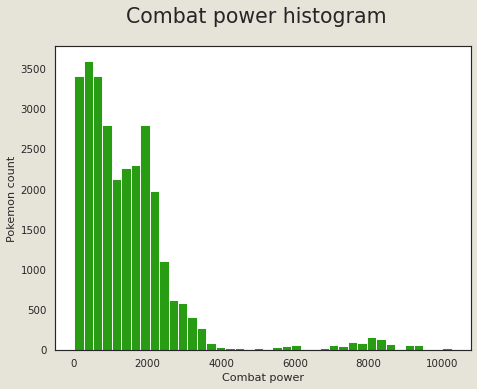

In [199]:
sns.set_style("white")
sns.set_context("notebook")

plt.figure(num=None, figsize=(8, 6), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat power histogram', fontsize=22)
plt.hist(pokemon_df['Combat Power'], bins=40, color="#289D13")
plt.xlabel("Combat power")
plt.ylabel("Pokemon count")
plt.show()

# Simple correlation matrix bwtween statistics

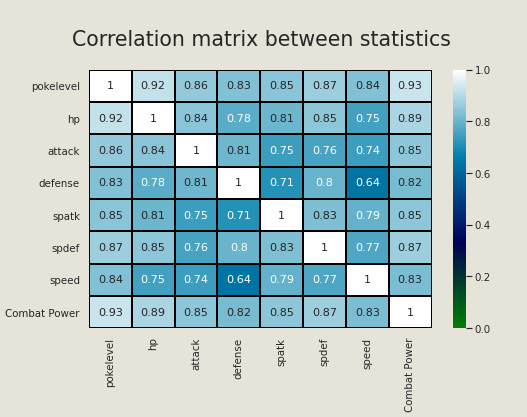

In [200]:
corr = pokemon_df[["pokelevel","hp","attack","defense","spatk","spdef","speed","Combat Power"]].corr()

plt.figure(num=None, figsize=(8, 6), dpi=67, facecolor='#E6E3D9', edgecolor='k').suptitle('Correlation matrix between statistics', fontsize=22)
sns.heatmap(corr,cmap="ocean",vmax=1,vmin=0,annot=True,linewidths=1,linecolor="black")
plt.tight_layout()

# Simple widget exploring data

Dropdown(description='List', options=('Minimum', 'Maximum', 'Average', 'Mode', 'Standard deviation'), value='M…

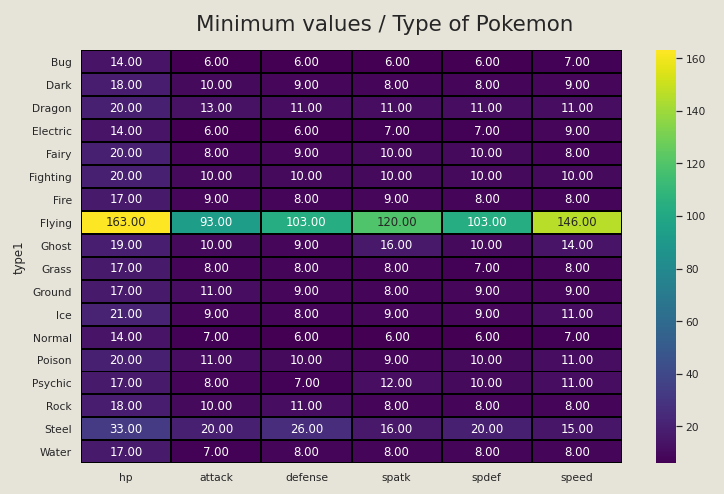

In [201]:
slowniczek = {
        "Minimum": pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").min(),
        "Maximum" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").max(),
        "Average" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").mean(),
        "Mode" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").median(),
        "Standard deviation" : pokemon_df[["hp","attack","defense","spatk","spdef","speed","type1"]].groupby("type1").std()
        }
default = 'Minimum'

plt.figure(num=None, figsize=(11, 7), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{default} values / Type of Pokemon', fontsize=22)
sns.heatmap(data = slowniczek[default],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
plt.tight_layout()

w = widgets.Dropdown(
    options=slowniczek.keys(),
    value = default,
    description='List',
)
display(w)

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        xxx = change['new']
        plt.figure(num=None, figsize=(11, 7), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle(f'{xxx} values / Type of Pokemon', fontsize=22)
        sns.heatmap(data = slowniczek[change['new']],annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
        plt.tight_layout()

        
w.observe(on_change)

# Combat power variant 1

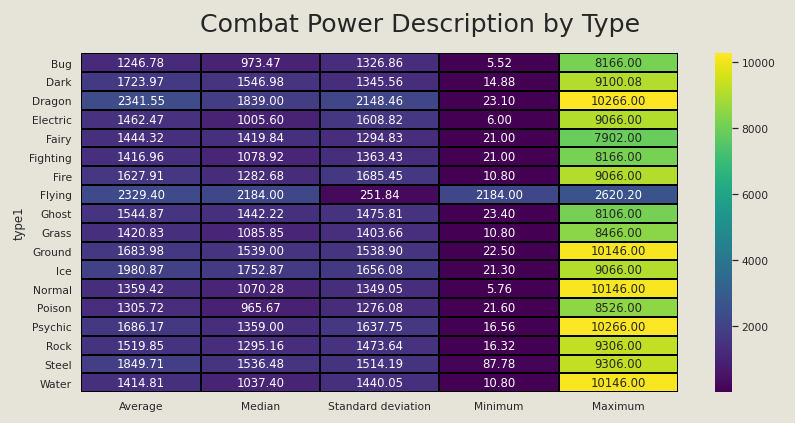

In [202]:
x = pokemon_df[["Combat Power","type1"]].groupby("type1").mean()
y = pokemon_df[["Combat Power","type1"]].groupby("type1").median()
z = pokemon_df[["Combat Power","type1"]].groupby("type1").std()
t = pokemon_df[["Combat Power","type1"]].groupby("type1").min()
u = pokemon_df[["Combat Power","type1"]].groupby("type1").max()
data_frames = [x,y,z,t,u]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['type1'],how='left'), data_frames)
df_merged.columns = ["Average","Median","Standard deviation","Minimum","Maximum"]

plt.figure(num=None, figsize=(12, 6), dpi=70, facecolor='#E6E3D9', edgecolor='k').suptitle('Combat Power Description by Type', fontsize=26)
sns.heatmap(df_merged,annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black")
plt.tight_layout()

# Combat power variant 2

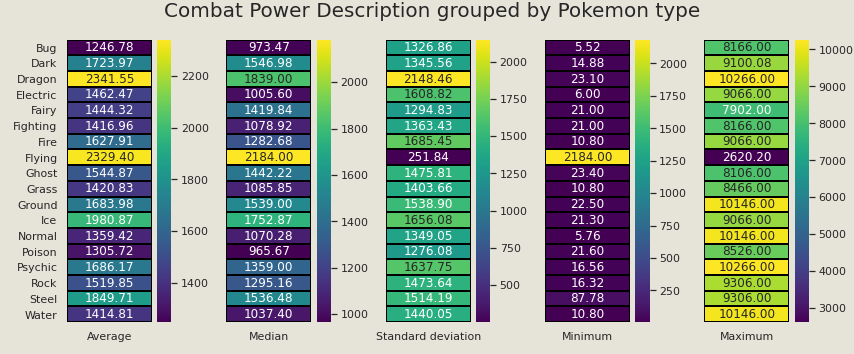

In [203]:
f, axs = plt.subplots(1, df_merged.columns.size, figsize=(12, 5,),facecolor="#E6E3D9")
for i, (s, a) in enumerate(zip(df_merged.columns, axs)):
    sns.heatmap(np.array([df_merged[s].values]).T, yticklabels=df_merged.index, xticklabels=[s], annot=True,fmt=".2f",cmap="viridis", linewidths=1,linecolor="black", ax=a)
    if i>0:
        a.yaxis.set_ticks([])
f.suptitle("Combat Power Description grouped by Pokemon type",fontsize=20)
f.tight_layout()